# Progetto Web Intelligence
Scodeller Giovanni 864906

# Caricamento Dati e EDA

In [1]:
# LIBRERIE
import pandas as pd
import numpy as np

from function import addPrevWin, addRateo, addFieldWR, loadDataset, randomSwap, generalFormatting, tournamentSimulation, confusionMatrix
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

In [2]:
# CARICAMENTO DATI
df2017 = loadDataset("2017")
df2017

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,EXW,EXL,LBW,LBL,PSW,PSL,MaxW,MaxL,AvgW,AvgL
0,1,Brisbane,Brisbane International,2017-01-01,ATP250,Outdoor,Hard,1st Round,3,Thompson J.,...,1.22,3.50,1.30,3.50,1.31,3.73,1.33,3.90,1.29,3.50
1,1,Brisbane,Brisbane International,2017-01-02,ATP250,Outdoor,Hard,1st Round,3,Mahut N.,...,1.45,2.35,1.53,2.50,1.58,2.52,1.59,2.55,1.54,2.43
2,1,Brisbane,Brisbane International,2017-01-02,ATP250,Outdoor,Hard,1st Round,3,Ferrer D.,...,1.88,1.75,2.00,1.80,2.10,1.81,2.15,1.82,2.01,1.77
3,1,Brisbane,Brisbane International,2017-01-02,ATP250,Outdoor,Hard,1st Round,3,Edmund K.,...,1.35,2.75,1.40,3.00,1.42,3.09,1.42,3.25,1.37,3.01
4,1,Brisbane,Brisbane International,2017-01-02,ATP250,Outdoor,Hard,1st Round,3,Dimitrov G.,...,1.38,2.65,1.40,3.00,1.41,3.13,1.46,3.13,1.41,2.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2628,67,London,Masters Cup,2017-11-17,Masters Cup,Indoor,Hard,Round Robin,3,Goffin D.,...,1.95,1.75,2.00,1.80,2.13,1.80,2.15,1.91,2.05,1.79
2629,67,London,Masters Cup,2017-11-17,Masters Cup,Indoor,Hard,Round Robin,3,Dimitrov G.,...,1.20,4.10,1.22,4.33,1.24,4.57,1.29,4.57,1.23,4.25
2630,67,London,Masters Cup,2017-11-18,Masters Cup,Indoor,Hard,Semifinals,3,Goffin D.,...,7.25,1.06,7.50,1.08,10.37,1.08,10.37,1.12,8.45,1.08
2631,67,London,Masters Cup,2017-11-18,Masters Cup,Indoor,Hard,Semifinals,3,Dimitrov G.,...,1.38,2.80,1.40,2.75,1.44,3.07,1.45,3.20,1.40,2.95


## ESPLORIAMO IL CONTENUTO DI UNA ENTRY
row = df2017.loc[140]
for i in df2017.columns:
    print(i,":", row[i])

In [4]:
# VEDIAMO I TIPI DI DATO DELLE FEATURE
df2017.dtypes

ATP                    int64
Location              object
Tournament            object
Date          datetime64[ns]
Series                object
Court                 object
Surface               object
Round                 object
Best of                int64
Winner                object
Loser                 object
WRank                  int64
LRank                float64
WPts                   int64
LPts                 float64
W1                   float64
L1                   float64
W2                   float64
L2                   float64
W3                   float64
L3                   float64
W4                   float64
L4                   float64
W5                   float64
L5                   float64
Wsets                float64
Lsets                float64
Comment               object
B365W                float64
B365L                float64
EXW                  float64
EXL                  float64
LBW                  float64
LBL                  float64
PSW           

In [5]:
# FEATURE POTENZIALMENTE CATEGORIALI O FATTORIALI
strcol=[]
for col in df2017.columns:
    if type(df2017[col][0]) == str:
        strcol.append(col)
strcol 

['Location',
 'Tournament',
 'Series',
 'Court',
 'Surface',
 'Round',
 'Winner',
 'Loser',
 'Comment']

# Funzione per una formattazione generale del dataset

In questa funzione viene anche aggiunto la colonna "target", la feature che andremmo a prevedere.

Inoltre la funzione ***generalFormatting*** si preoccupa di cambiare il nome delle feature rendendole anonime, "Winner" -> "Player1" e "Loser" -> "Player2", poi applica varie tecniche per formattare i dati.
In generale le tecniche applicate sono:
+ le colonne che contengono valori nulli vengono sistemati a criterio, se un giocatore non ha punti in classifica entra con il minor numero di punti.
+ Le colonne che contengono delle categorie, come "Court", "Surface" e "Best of" viene applicato il OneHotEncoding che crea tante feature tante quante sono le categorie di quella feature assegnando valori 0 o 1. Esempio: "Court" contiene "Indoor" e "Outdoor", verrano create "Court_Indoor" e "Court_Outdoor"
+ Altre variabili come "Series" viene applicato il label enconding, ovvero viene data un'ettichetta numerica ad ogni classe della feature

In [6]:
df2017 = generalFormatting(df2017)
df2017

,Tournament,Date,Series,Round,Player1,Player2,P1_Rank,P2_Rank,P1_Pts,P2_Pts,...,P1_Avg,P2_Avg,Court_Indoor,Court_Outdoor,Surface_Clay,Surface_Grass,Surface_Hard,Best of_3,Best of_5,target
0,15,2017-01-01,0,1,Thompson J.,Ymer E.,79,160.0,689,372.0,...,1.29,3.50,0,1,0,0,1,1,0,0
1,15,2017-01-02,0,1,Mahut N.,Robert S.,39,54.0,1102,854.0,...,1.54,2.43,0,1,0,0,1,1,0,0
2,15,2017-01-02,0,1,Ferrer D.,Tomic B.,21,26.0,1785,1465.0,...,2.01,1.77,0,1,0,0,1,1,0,0
3,15,2017-01-02,0,1,Edmund K.,Escobedo E.,45,141.0,1001,443.0,...,1.37,3.01,0,1,0,0,1,1,0,0
4,15,2017-01-02,0,1,Dimitrov G.,Johnson S.,17,33.0,2035,1320.0,...,1.41,2.85,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2628,39,2017-11-17,3,0,Goffin D.,Thiem D.,8,4.0,2975,3815.0,...,2.05,1.79,1,0,0,0,1,1,0,0
2629,39,2017-11-17,3,0,Dimitrov G.,Carreno Busta P.,6,10.0,3650,2615.0,...,1.23,4.25,1,0,0,0,1,1,0,0
2630,39,2017-11-18,3,6,Goffin D.,Federer R.,8,2.0,2975,9005.0,...,8.45,1.08,1,0,0,0,1,1,0,0
2631,39,2017-11-18,3,6,Dimitrov G.,Sock J.,6,9.0,3650,2765.0,...,1.40,2.95,1,0,0,0,1,1,0,0


# Prima prova applicazione modello

droppiamo le colonne che non posso essere calcolate a priori

In [7]:

df2017.drop(["Date", 'P1_S1', 'P2_S1', 'P1_S2',
       'P2_S2', 'P1_S3', 'P2_S3', 'P1_S4', 'P2_S4', 'P1_S5', 'P2_S5',
       'P1_sets', 'P2_sets', 'P1_B365', 'P2_B365', 'P1_EX', 'P2_EX', 'P1_LB',
       'P2_LB', 'P1_PS', 'P2_PS', 'P1_Max', 'P2_Max', 'P1_Avg', 'P2_Avg'], axis = 1, inplace = True)

print("Loaded 2017")


Loaded 2017


In [8]:
df2017.head()

,Tournament,Series,Round,Player1,Player2,P1_Rank,P2_Rank,P1_Pts,P2_Pts,Court_Indoor,Court_Outdoor,Surface_Clay,Surface_Grass,Surface_Hard,Best of_3,Best of_5,target
0,15,0,1,Thompson J.,Ymer E.,79,160.0,689,372.0,0,1,0,0,1,1,0,0
1,15,0,1,Mahut N.,Robert S.,39,54.0,1102,854.0,0,1,0,0,1,1,0,0
2,15,0,1,Ferrer D.,Tomic B.,21,26.0,1785,1465.0,0,1,0,0,1,1,0,0
3,15,0,1,Edmund K.,Escobedo E.,45,141.0,1001,443.0,0,1,0,0,1,1,0,0
4,15,0,1,Dimitrov G.,Johnson S.,17,33.0,2035,1320.0,0,1,0,0,1,1,0,0


 # Applicazione modello stupido
In questo modello diciamo che il giocatore più forte vincerà sempre

In [9]:
y_test = df2017["target"]
y_pred = []
for i in range(0,df2017.shape[0]):
    y_pred.append(np.where(df2017.loc[i,"P1_Rank"] < df2017.loc[i,"P2_Rank"], 0, 1))
    
print("Accuracy score: ", accuracy_score(y_true = y_test, y_pred=y_pred))

Accuracy score:  0.6498290922901633


Notiamo che il modello è preciso al ~ 65% delle previsioni

In [10]:
randomSwap(df2017, 1700)

Colonne che verranno swappate:
['Player1', 'Player2', 'P1_Rank', 'P2_Rank', 'P1_Pts', 'P2_Pts']
Random swap 1700/1700


# Applicazione KNN

In [11]:
from sklearn import neighbors
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = df2017.drop(["Player1","Player2", "Tournament","target"], axis = 1)
y= df2017["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

print(X_train.columns)

maxknn=[]

for k in range(1,15):    
    kNN = neighbors.KNeighborsClassifier(n_neighbors=k)
    kNN.fit(X_train,y_train)

    y_pred = kNN.predict(X_test)
    train_acc = accuracy_score(y_true=y_train, y_pred=kNN.predict(X_train))
    test_acc = accuracy_score(y_true=y_test, y_pred=kNN.predict(X_test))
    # matr[max_leaves, max_depth]=test_acc
    maxknn.append(tuple([test_acc,k]))
    #print ("Neighbors:", k, " - Train Accuracy:", train_acc, " - Test Accuracy:", test_acc)
    maxknn.append(tuple([test_acc,k]))
    
print("max Accuracy",max(maxknn)[0], "| number of neighbors",max(maxknn)[1] )

Index(['Series', 'Round', 'P1_Rank', 'P2_Rank', 'P1_Pts', 'P2_Pts',
       'Court_Indoor', 'Court_Outdoor', 'Surface_Clay', 'Surface_Grass',
       'Surface_Hard', 'Best of_3', 'Best of_5'],
      dtype='object')
max Accuracy 0.669735327963176 | number of neighbors 10


# Applicazione albero

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [13]:
leavesArr = []

# Esploro variando il numero di foglie

for max_leaves in range(2,50):
    # train and predict
    dt = tree.DecisionTreeClassifier(max_leaf_nodes=max_leaves)
    dt.fit(X_train,y_train)
    train_acc = accuracy_score(y_true=y_train, y_pred=dt.predict(X_train))
    test_acc = accuracy_score(y_true=y_test, y_pred=dt.predict(X_test))
    leavesArr.append(tuple([test_acc,max_leaves]))
    # print ("Leaves:", max_leaves, " - Train Accuracy:", train_acc, " - Test Accuracy:", test_acc)
    
print("max Accuracy",max(leavesArr)[0], "| number leaves",max(leavesArr)[1] )

max Accuracy 0.6731875719217492 | number leaves 7


In [14]:
depthArr = []

#Esploro cambiando il numero di profondita

for max_depth in range(2,50):
    # train and predict
    dt = tree.DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train,y_train)
    train_acc = accuracy_score(y_true=y_train, y_pred=dt.predict(X_train))
    test_acc = accuracy_score(y_true=y_test, y_pred=dt.predict(X_test))
    # matr[max_leaves, max_depth]=test_acc
    depthArr.append(tuple([test_acc,max_depth]))
    #print ("Depth:", max_depth, " - Train Accuracy:", train_acc, " - Test Accuracy:", test_acc)
    
print("max Accuracy",max(depthArr)[0], "| number depth",max(depthArr)[1] )

max Accuracy 0.6651323360184119 | number depth 3


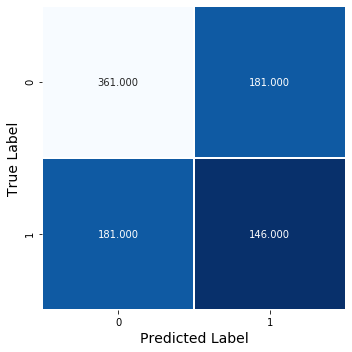

In [15]:
confusionMatrix(y_test,dt.predict(X_test))

# Aggiunta delle feature sui dataset

Di seguito vengono formattati i dataset del 2017, 2018 e 2019 per utilizzare nei modelli di decisione

In [16]:
df2017 = loadDataset("2017")
df2017 = generalFormatting(df2017)
df2017.drop(["Date", 'P1_S1', 'P2_S1', 'P1_S2',
       'P2_S2', 'P1_S3', 'P2_S3', 'P1_S4', 'P2_S4', 'P1_S5', 'P2_S5',
       'P1_sets', 'P2_sets', 'P1_B365', 'P2_B365', 'P1_EX', 'P2_EX', 'P1_LB',
       'P2_LB', 'P1_PS', 'P2_PS', 'P1_Max', 'P2_Max', 'P1_Avg', 'P2_Avg'], axis = 1, inplace = True)

print("Loaded 2017")

Loaded 2017


In [17]:
df2018 = loadDataset("2018")
df2018 = addFieldWR(df2018,8)
df2018.drop(["Date", 'P1_S1', 'P2_S1', 'P1_S2',
       'P2_S2', 'P1_S3', 'P2_S3', 'P1_S4', 'P2_S4', 'P1_S5', 'P2_S5',
       'P1_sets', 'P2_sets', 'P1_B365', 'P2_B365', 'P1_EX', 'P2_EX', 'P1_LB',
       'P2_LB', 'P1_PS', 'P2_PS', 'P1_Max', 'P2_Max', 'P1_Avg', 'P2_Avg'], axis = 1, inplace = True)

print("Loaded 2018")

# need this for adding rateo in 2019
df2018noswap = df2018

# work on 2018 for training the model
randomSwap(df2018,1700)
addPrevWin(df2018)
addRateo(df2017,df2018)

print("2018 Ready")

addFieldWR
fieldWinLose
Loaded dataset 2017
1343
Processing all player 1343/1343
Adding rateo 2637/2637
Loaded 2018
Colonne che verranno swappate:
['Player1', 'Player2', 'P1_Rank', 'P2_Rank', 'P1_Pts', 'P2_Pts', 'P1_winningField', 'P1_losingField', 'P2_winningField', 'P2_losingField']
Random swap 1700/1700
adding win streak / lose streak 2637/2637
2018 Ready


In [18]:
df2019 = loadDataset("2019")
df2019 = addFieldWR(df2019,9)
df2019.drop(["Date", 'P1_S1', 'P2_S1', 'P1_S2', 'P2_S2', 'P1_S3', 'P2_S3', 'P1_S4', 'P2_S4', 'P1_S5', 'P2_S5',
       'P1_sets', 'P2_sets', 'P1_B365', 'P2_B365', 'P1_PS', 'P2_PS', 'P1_Max', 'P2_Max', 'P1_Avg', 'P2_Avg'], axis = 1, inplace = True)

print("Loaded 2019")

# 2019 ready for go
addPrevWin(df2019)
randomSwap(df2019,1700)

print("Ready 2019")

addFieldWR
fieldWinLose
Loaded dataset 2018
1381
Processing all player 1381/1381
Adding rateo 2610/2610
Loaded 2019
adding win streak / lose streak 2610/2610
Colonne che verranno swappate:
['Player1', 'Player2', 'P1_Rank', 'P2_Rank', 'P1_Pts', 'P2_Pts', 'P1_winningField', 'P1_losingField', 'P2_winningField', 'P2_losingField', 'P1_precWin', 'P2_precWin', 'P1_precLose', 'P2_precLose']
Random swap 1700/1700
Ready 2019


# Test dell'albero di decisione con le feature aggiunte

In [19]:
X = df2018.drop(["Player1", "Player2", "Tournament" , "target"], axis = 1)
y = df2018["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

GiniTreeArr = []

# Esploro variando il numero di foglie
for max_leaves in range(2,50):
    # train and predict
    dt = tree.DecisionTreeClassifier(max_leaf_nodes=max_leaves)
    dt.fit(X_train,y_train)
    train_acc = accuracy_score(y_true=y_train, y_pred=dt.predict(X_train))
    test_acc = accuracy_score(y_true=y_test, y_pred=dt.predict(X_test))
    GiniTreeArr.append(tuple([test_acc,max_leaves, dt]))
    # print ("Leaves:", max_leaves, " - Train Accuracy:", train_acc, " - Test Accuracy:", test_acc)
    
print("max Accuracy",max(GiniTreeArr)[0], "| number leaves",max(GiniTreeArr)[1] )

max Accuracy 0.8025258323765786 | number leaves 37


In [39]:
# Information Gain Split

X = df2018.drop(["Player1", "Player2", "Tournament","target"], axis = 1)
y = df2018["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

InfoTreeArr = []

# Esploro variando il numero di foglie
for max_leaves in range(2,50):
    # train and predict
    dt = tree.DecisionTreeClassifier(max_leaf_nodes=max_leaves, criterion ="entropy")
    dt.fit(X_train,y_train)
    train_acc = accuracy_score(y_true=y_train, y_pred=dt.predict(X_train))
    test_acc = accuracy_score(y_true=y_test, y_pred=dt.predict(X_test))
    InfoTreeArr.append(tuple([test_acc,max_leaves, dt]))
    # print ("Leaves:", max_leaves, " - Train Accuracy:", train_acc, " - Test Accuracy:", test_acc)
    
print("max Accuracy",max(InfoTreeArr)[0], "| number leaves",max(InfoTreeArr)[1] )

max Accuracy 0.7795637198622273 | number leaves 34


In [21]:
bestTree = max(GiniTreeArr)[2]
bestTree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=37,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

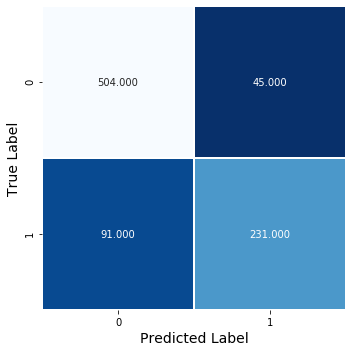

In [22]:
confusionMatrix(y_test,bestTree.predict(X_test))

Text(0, 0.5, 'Feature importance %')

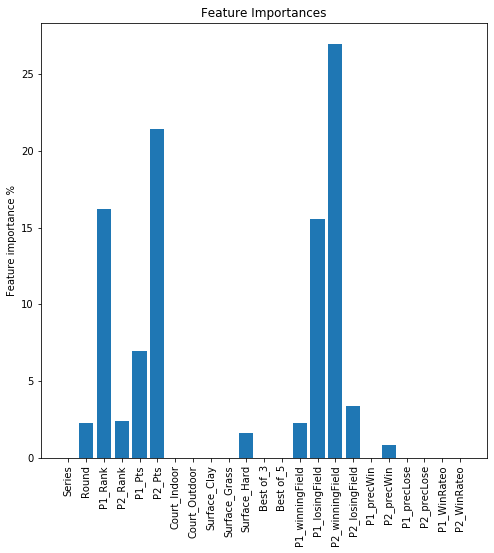

In [23]:
# Grafico dell'importanza delle feature

%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,8))
ax.bar(X_test.columns, bestTree.feature_importances_ * 100)
plt.xticks(np.arange(0, len(X_test.columns)), rotation = "vertical")
ax.set_title("Feature Importances")
ax.set_ylabel("Feature importance %")

# Grafico dell'albero di decisione

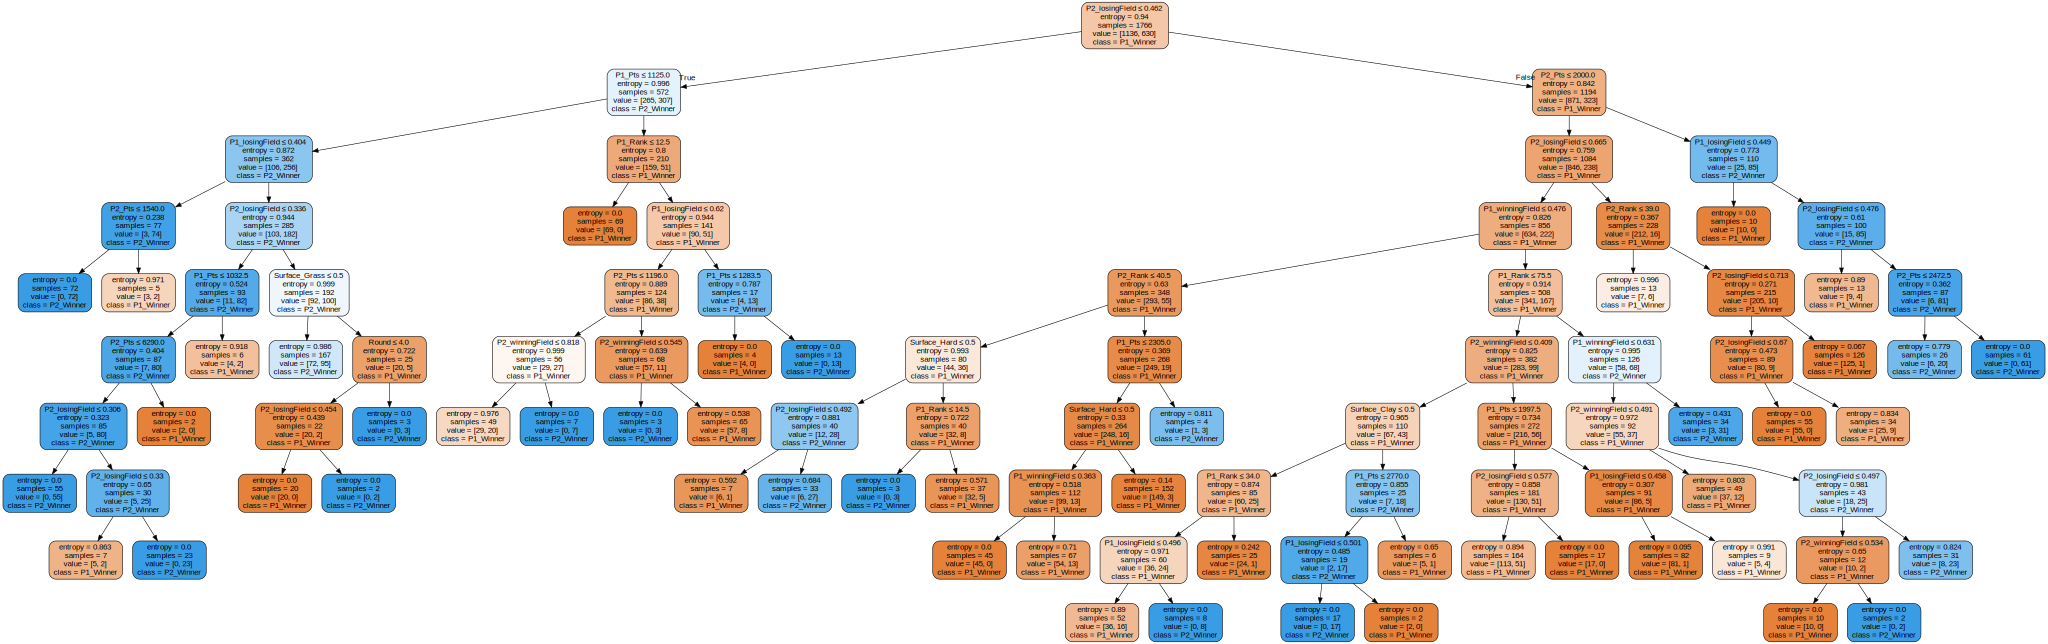

In [24]:
import graphviz 

f_names =  X_test.columns.tolist()

c_names = ["P1_Winner","P2_Winner"]

dot_data = tree.export_graphviz(dt, out_file=None, 
                                feature_names=f_names, class_names=c_names,  
                                filled=True, rounded=True, special_characters=True)  


graph = graphviz.Source(dot_data)
graph

Vengono provati gli algoritmi di bagging e boosting per vedere di quando è possibile migliorare un albero di decisione

In [25]:
# try bagging
from sklearn.ensemble import BaggingClassifier

for i in range(1,15):
    bagged_dt = BaggingClassifier(bestTree, n_estimators=i)

    bagged_dt.fit(X_train,y_train)
    print ("Accuracy:", accuracy_score(y_true=y_test, y_pred=bagged_dt.predict(X_test)) )

Accuracy: 0.7807118254879449
Accuracy: 0.7876004592422503
Accuracy: 0.7841561423650976
Accuracy: 0.7887485648679678
Accuracy: 0.8071182548794489
Accuracy: 0.7807118254879449
Accuracy: 0.7967853042479908
Accuracy: 0.799081515499426
Accuracy: 0.8117106773823192
Accuracy: 0.8059701492537313
Accuracy: 0.8036739380022963
Accuracy: 0.7933409873708381
Accuracy: 0.8025258323765786
Accuracy: 0.8071182548794489


In [26]:
# boosting
from sklearn.ensemble import AdaBoostClassifier

for i in range(1,15):
    bagged_dt = AdaBoostClassifier(bestTree, n_estimators=i)

    bagged_dt.fit(X_train,y_train)
    print ("Accuracy:", accuracy_score(y_true=y_test, y_pred=bagged_dt.predict(X_test)) )

Accuracy: 0.7657864523536165
Accuracy: 0.7703788748564868
Accuracy: 0.7749712973593571
Accuracy: 0.7795637198622273
Accuracy: 0.7853042479908151
Accuracy: 0.7910447761194029
Accuracy: 0.7887485648679678
Accuracy: 0.7910447761194029
Accuracy: 0.8059701492537313
Accuracy: 0.8105625717566016
Accuracy: 0.8151549942594719
Accuracy: 0.8197474167623421
Accuracy: 0.8151549942594719
Accuracy: 0.8082663605051664


# Random forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

X = df2018.drop(["Player1", "Player2", "Tournament" ,"target"], axis = 1)
y = df2018["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

forestArr = []
rfArr = []

for forest in range(2,100):
    print("making forest with {} trees".format(forest), end ="\r")
    # train and predict
    rf = RandomForestClassifier(n_estimators=forest)
    rf.fit(X_train,y_train)
    train_acc = accuracy_score(y_true=y_train, y_pred=rf.predict(X_train))
    test_acc = accuracy_score(y_true=y_test, y_pred=rf.predict(X_test))
    forestArr.append(tuple([test_acc,forest, rf]))
    # print ("Forest:", forest, " - Train Accuracy:", train_acc, " - Test Accuracy:", test_acc)
    
print("") 
print("max Accuracy",max(forestArr)[0], "| number of trees",max(forestArr)[1] )

bestForest = max(forestArr)[2]


making forest with 99 trees
max Accuracy 0.8461538461538461 | number of trees 41


In [28]:
# Costruzione della foresta migliore
bestForest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=41,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
# Feature importance in RF
for i,col in enumerate(X_test.columns):
    print("Feature '{}' importance {:.2f} %".format(col, bestForest.feature_importances_[i]*100))

Feature 'Series' importance 1.78 %
Feature 'Round' importance 2.46 %
Feature 'P1_Rank' importance 9.70 %
Feature 'P2_Rank' importance 8.43 %
Feature 'P1_Pts' importance 9.27 %
Feature 'P2_Pts' importance 9.69 %
Feature 'Court_Indoor' importance 0.57 %
Feature 'Court_Outdoor' importance 0.62 %
Feature 'Surface_Clay' importance 1.04 %
Feature 'Surface_Grass' importance 0.89 %
Feature 'Surface_Hard' importance 1.06 %
Feature 'Best of_3' importance 0.50 %
Feature 'Best of_5' importance 0.52 %
Feature 'P1_winningField' importance 9.45 %
Feature 'P1_losingField' importance 9.66 %
Feature 'P2_winningField' importance 11.91 %
Feature 'P2_losingField' importance 11.32 %
Feature 'P1_precWin' importance 3.26 %
Feature 'P2_precWin' importance 2.02 %
Feature 'P1_precLose' importance 1.49 %
Feature 'P2_precLose' importance 2.05 %
Feature 'P1_WinRateo' importance 1.24 %
Feature 'P2_WinRateo' importance 1.09 %


Text(0, 0.5, 'Feature importance %')

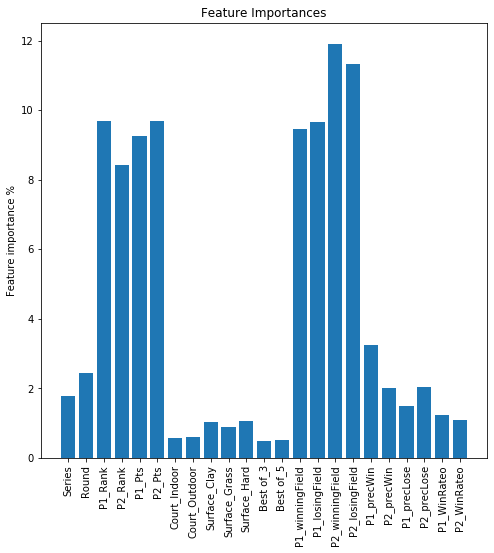

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,8))
ax.bar(X_test.columns, bestForest.feature_importances_ * 100)
plt.xticks(np.arange(0, len(X_test.columns)), rotation = "vertical")
ax.set_title("Feature Importances")
ax.set_ylabel("Feature importance %")

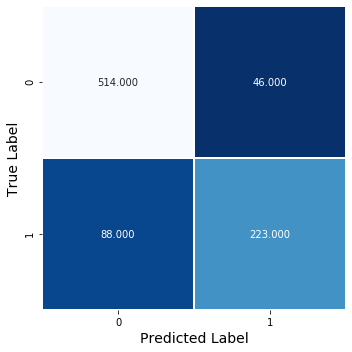

In [31]:
confusionMatrix(y_test,bestForest.predict(X_test))

# ROC - AUC 

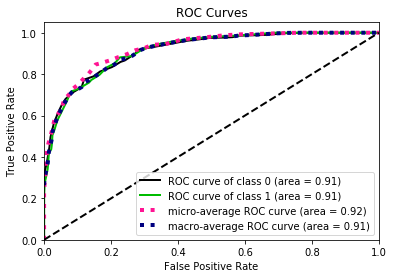

In [32]:
import scikitplot as skplt

y_score = bestForest.predict_proba(X_test)

skplt.metrics.plot_roc(y_test, y_score)
plt.show()

# Recursive Feature Elimination (RFE)

In [40]:
# Recursive Feature Elimination 
from sklearn.feature_selection import RFE

from itertools import compress

X = df2018.drop(["Player1","Player2", "Tournament" ,"target"], axis = 1)
y = df2018["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

n = 8

selector = RFE(rf, 
                 step=1, # features removed at each step
                 n_features_to_select= n # selected features
                )
selector.fit(X_train,y_train)



print("Top {} important feature selected".format(n))

print(list(compress(X_test.columns.tolist(),selector.support_)))

Top 8 important feature selected
['P1_Rank', 'P2_Rank', 'P1_Pts', 'P2_Pts', 'P1_winningField', 'P1_losingField', 'P2_winningField', 'P2_losingField']


In [34]:
test_acc = accuracy_score(y_true=y_test, y_pred=selector.predict(X_test))

print ("Test Accuracy:", test_acc)

Test Accuracy: 0.8587830080367393


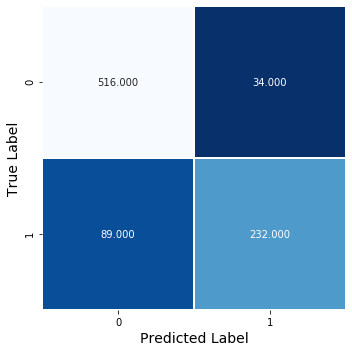

In [35]:
confusionMatrix(y_test,selector.predict(X_test))

# Tournament Simulation

Viene simulato il torneo con i diversi modelli di previsione per vederne il loro risultato

In [41]:
tournamentSimulation(df2019.loc[139:265,:], df2018noswap, bestTree)

Round 1
64
Round 2
32
Round 3
16
Round 4
8
Round 5
4
Round 6
2
Round 7
1


,Player,Rank,Pts,winningField,losingField,precWin,precLose
0,Thiem D.,8.0,4095.0,0.536585,0.463415,7,0


In [37]:
tournamentSimulation(df2019.loc[139:265,:], df2018noswap, bestForest)

Round 1
64
Round 2
32
Round 3
16
Round 4
8
Round 5
4
Round 6
2
Round 7
1


,Player,Rank,Pts,winningField,losingField,precWin,precLose
0,Anderson K.,6.0,4810.0,0.544643,0.455357,11,0


In [38]:
tournamentSimulation(df2019.loc[139:265,:], df2018noswap, selector)

Round 1
64
Round 2
32
Round 3
16
Round 4
8
Round 5
4
Round 6
2
Round 7
1


,Player,Rank,Pts,winningField,losingField,precWin,precLose
0,Paire B.,61.0,820.0,0.446328,0.553672,7,0
